In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [64]:
# Load the dataset
data = pd.read_csv("data/ryanair_reviews.csv")
print(data.describe)

<bound method NDFrame.describe of       Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-02-03            10.0    United Kingdom   
1              1     2024-01-26            10.0    United Kingdom   
2              2     2024-01-20            10.0    United Kingdom   
3              3     2024-01-07             6.0    United Kingdom   
4              4     2024-01-06            10.0            Israel   
...          ...            ...             ...               ...   
2244        2244     2012-08-28             2.0    United Kingdom   
2245        2245     2012-08-28             1.0    United Kingdom   
2246        2246     2012-08-28             1.0    United Kingdom   
2247        2247     2012-08-28             1.0         Australia   
2248        2248     2012-08-23             2.0    United Kingdom   

      Trip_verified                             Comment title  \
0      Not Verified         "bang on time and smooth flights"   
1     T

In [65]:
# Change columns
data = data.drop(columns=['Unnamed: 0'])
data['Date Published'] = pd.to_datetime(data['Date Published'])
data['Date Flown'] = pd.to_datetime(data['Date Flown'], errors='coerce')  # Using coerce to handle any invalid dates
data['Recommended'] = data['Recommended'].map({'yes': True, 'no': False})
data['Trip_verified'] = data['Trip_verified'].replace({'NotVerified': 'Not Verified', 'Unverified': 'Not Verified'})

In [66]:
# Descriptive statistics for demand_data
data_types = data.dtypes
data_types = pd.DataFrame(data_types, columns=['data_type'])
data_types_desc = data.describe().transpose()
data_missing = data.isnull().mean() * 100
data_missing = pd.DataFrame(data_missing, columns=['missing_percentage'])

summary = pd.merge(data_types, data_types_desc, how='outer', left_index=True, right_index=True)
summary = pd.merge(summary, data_missing, how='outer', left_index=True, right_index=True)
print(summary)

                             data_type   count                           mean  \
Aircraft                        object     NaN                            NaN   
Cabin Staff Service            float64  2128.0                        2.74718   
Comment                         object     NaN                            NaN   
Comment title                   object     NaN                            NaN   
Date Flown              datetime64[ns]    1631  2018-12-09 01:03:34.101777920   
Date Published          datetime64[ns]    2249  2017-10-06 01:50:07.736771840   
Destination                     object     NaN                            NaN   
Food & Beverages               float64  1312.0                       1.921494   
Ground Service                 float64  1578.0                       2.156527   
Inflight Entertainment         float64   331.0                         1.1571   
Origin                          object     NaN                            NaN   
Overall Rating              

In [67]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

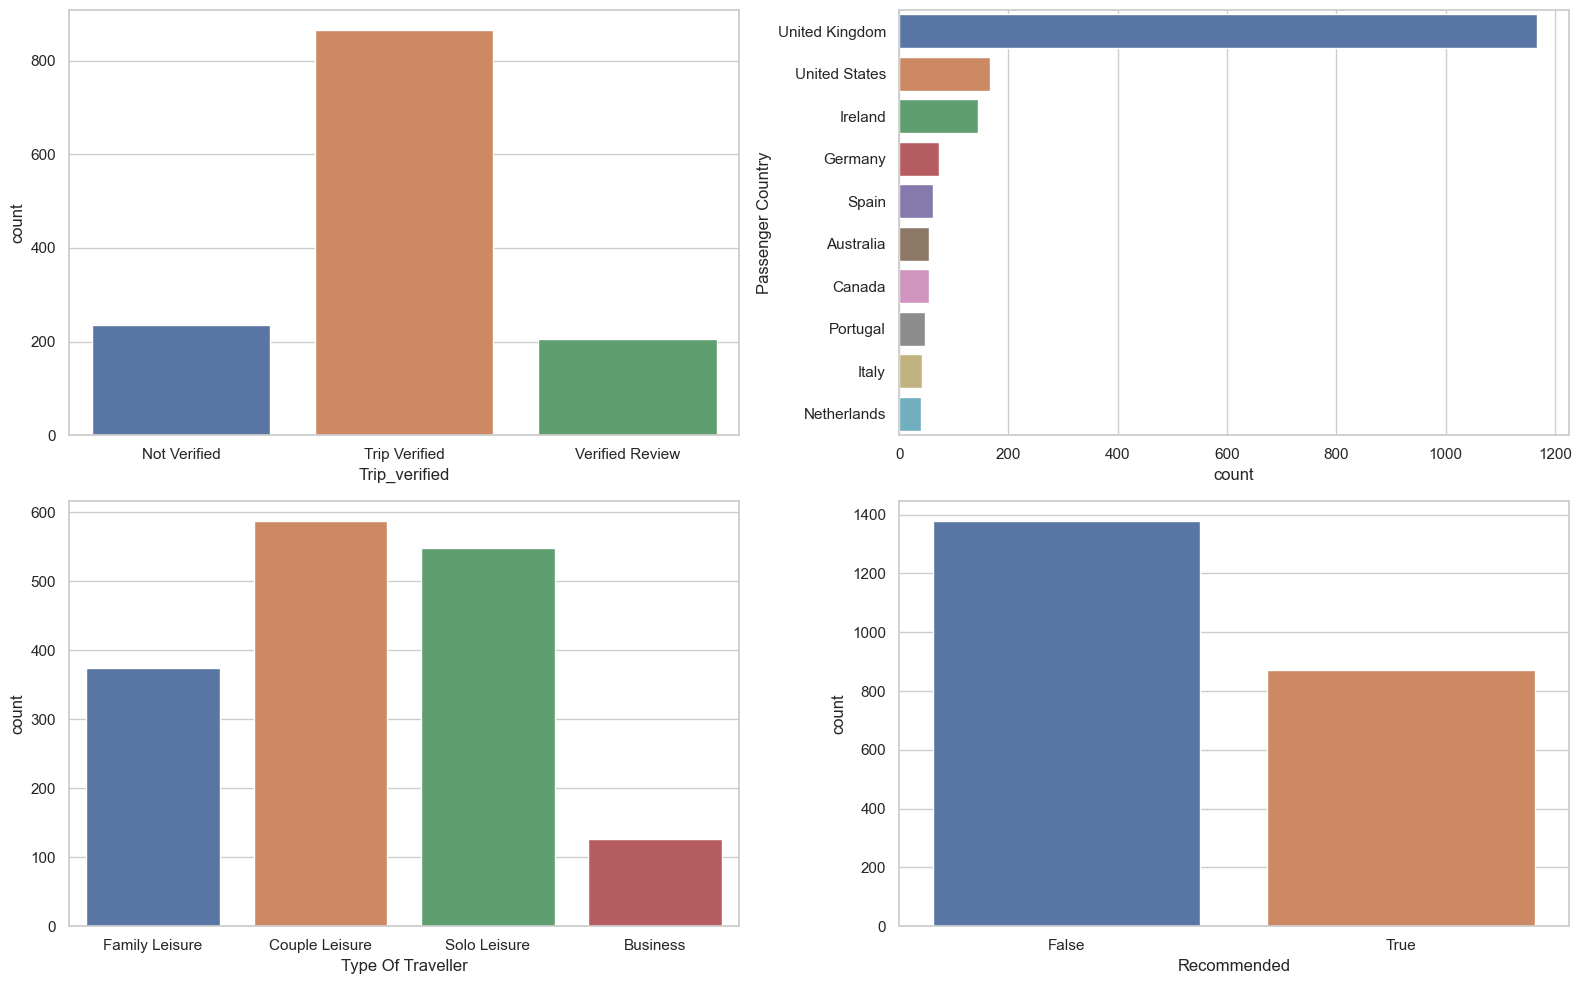

In [47]:
# Categorical Data Analysis: Count plots for various categorical/nominal columns (part 1)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
sns.countplot(data=data, x='Trip_verified', ax=axes[0, 0])
sns.countplot(data=data, y='Passenger Country', order=data['Passenger Country'].value_counts().index[:10], ax=axes[0, 1])
sns.countplot(data=data, x='Type Of Traveller', ax=axes[1, 0])
sns.countplot(data=data, x='Recommended', ax=axes[1, 1])
plt.tight_layout()
plt.show()

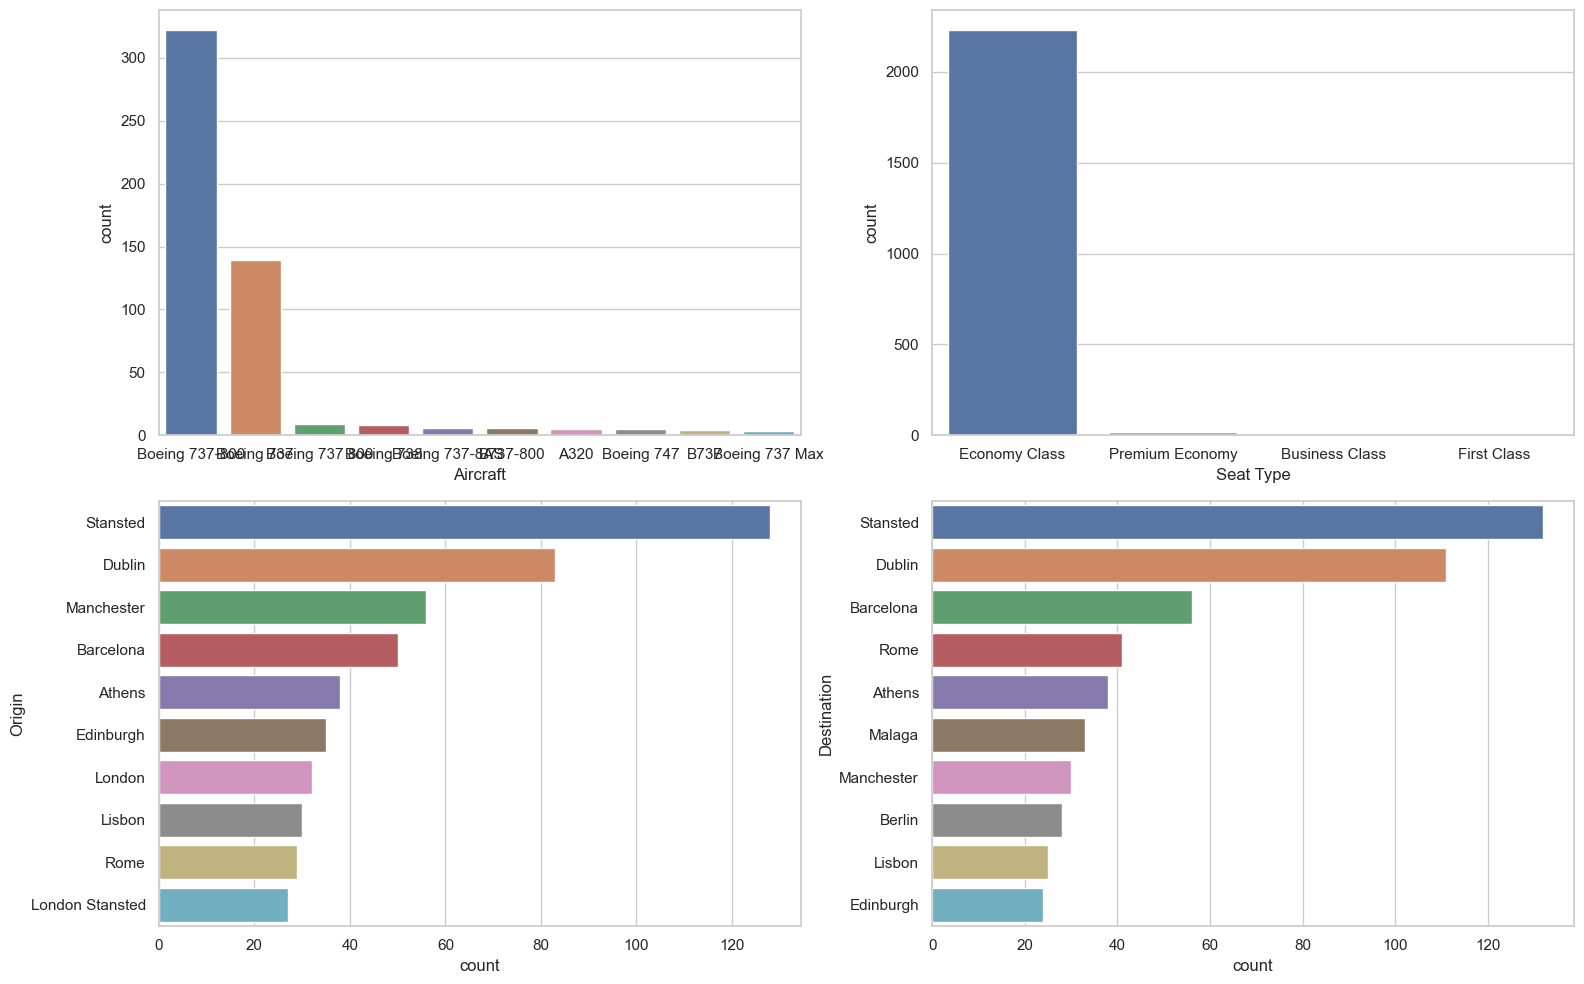

In [19]:
# Categorical Data Analysis: Count plots for various categorical/nominal columns (part 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
sns.countplot(data=data, x='Aircraft', order=data['Aircraft'].value_counts().index[:10], ax=axes[0, 0])
sns.countplot(data=data, x='Seat Type', ax=axes[0, 1])
sns.countplot(data=data, y='Origin', order=data['Origin'].value_counts().index[:10], ax=axes[1, 0])
sns.countplot(data=data, y='Destination', order=data['Destination'].value_counts().index[:10], ax=axes[1, 1])
plt.tight_layout()
plt.show()

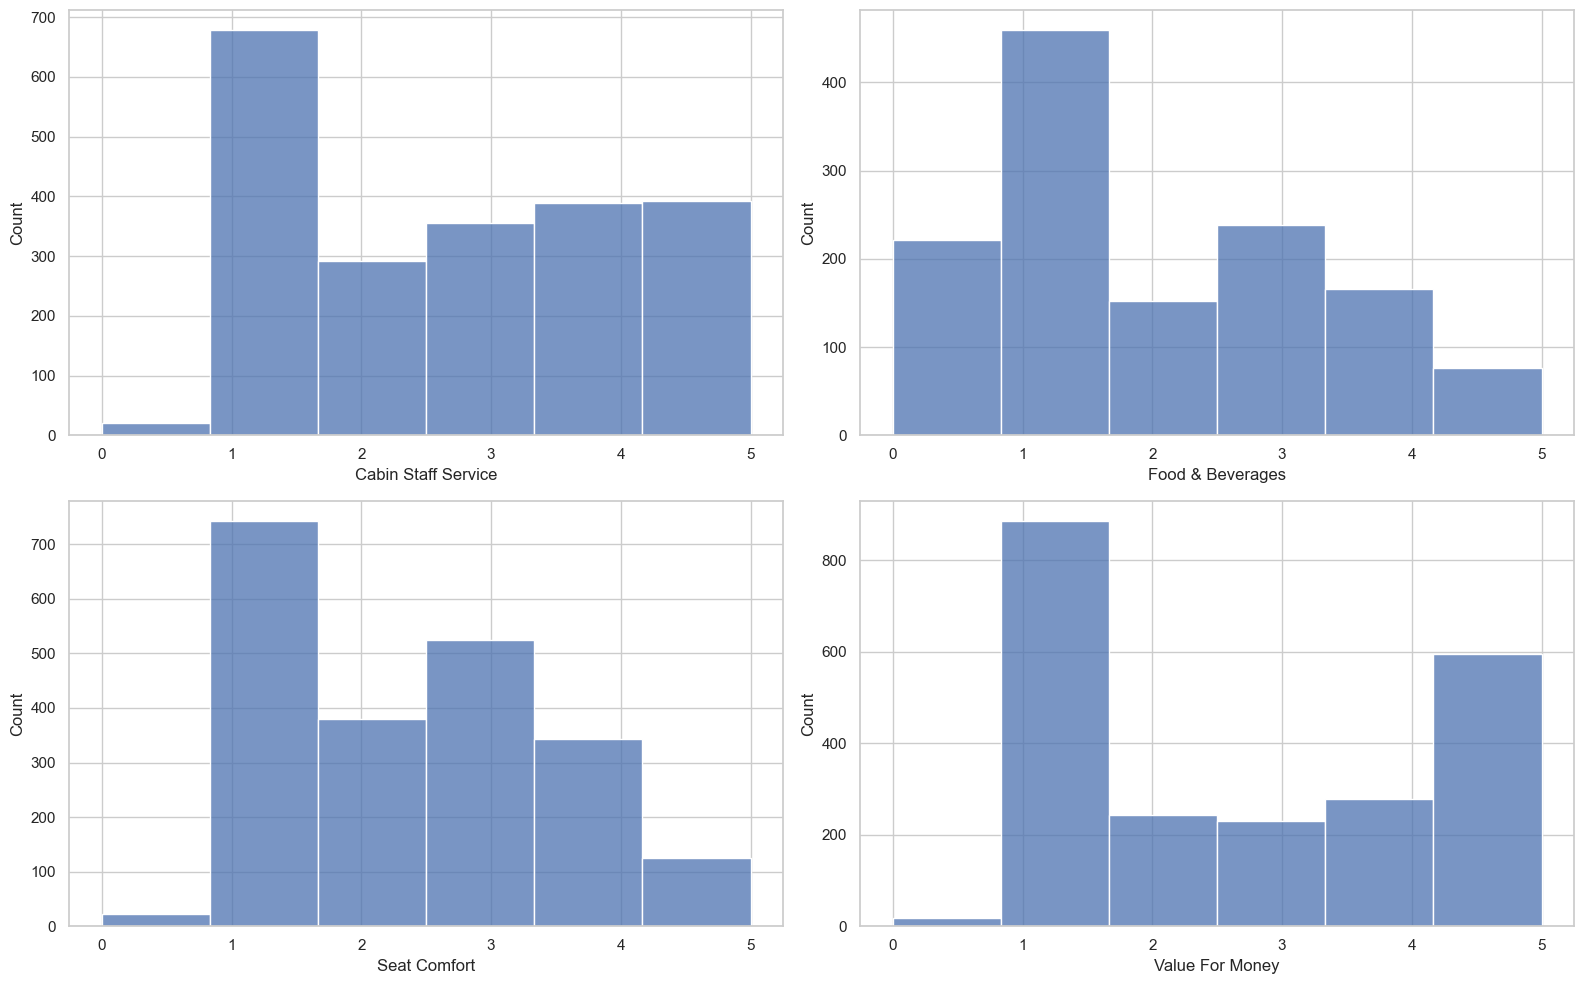

In [20]:
# Plotting the histogram and kde of the numerical/ordinal columns (part 1)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
sns.histplot(data=data, x='Cabin Staff Service', bins=6, kde=False, ax=axes[0, 0])
sns.histplot(data=data, x='Food & Beverages', bins=6, kde=False, ax=axes[0, 1])
sns.histplot(data=data, x='Seat Comfort', bins=6, kde=False, ax=axes[1, 0])
sns.histplot(data=data, x='Value For Money', bins=6, kde=False, ax=axes[1, 1])
plt.tight_layout()
plt.show()

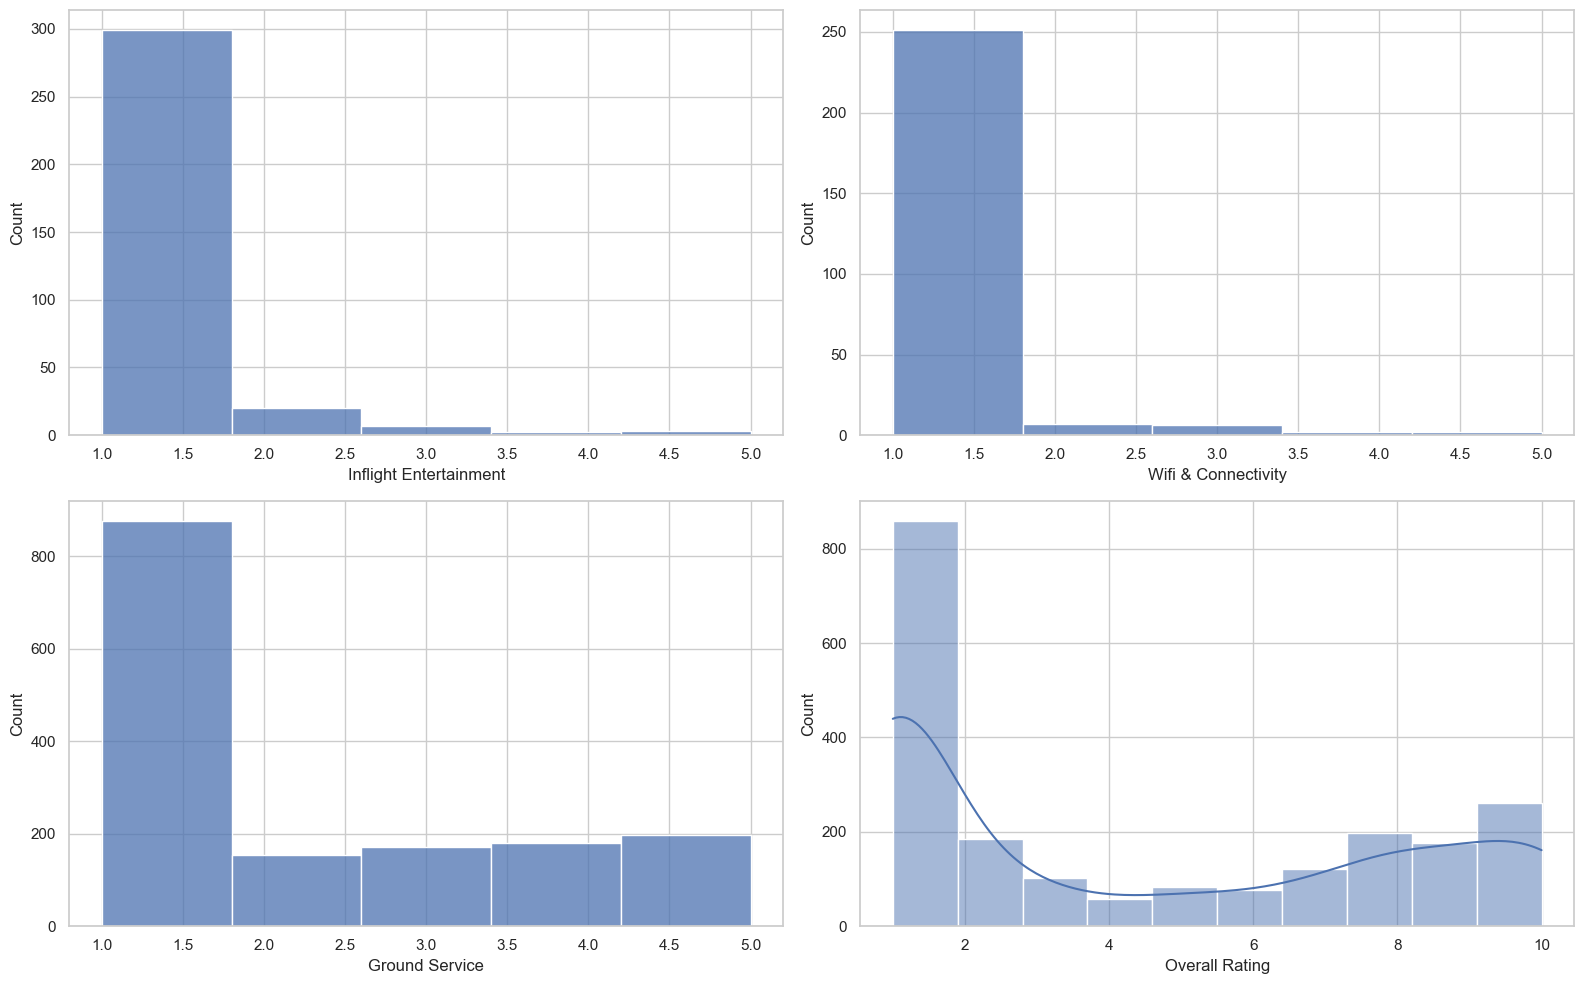

In [68]:
# Plotting the histogram and kde of the numerical/ordinal columns (part 2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
sns.histplot(data=data, x='Inflight Entertainment', bins=5, kde=False, ax=axes[0, 0])
sns.histplot(data=data, x='Wifi & Connectivity', bins=5, kde=False, ax=axes[0, 1])
sns.histplot(data=data, x='Ground Service', bins=5, kde=False, ax=axes[1, 0])
sns.histplot(data=data, x='Overall Rating', bins=10, kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

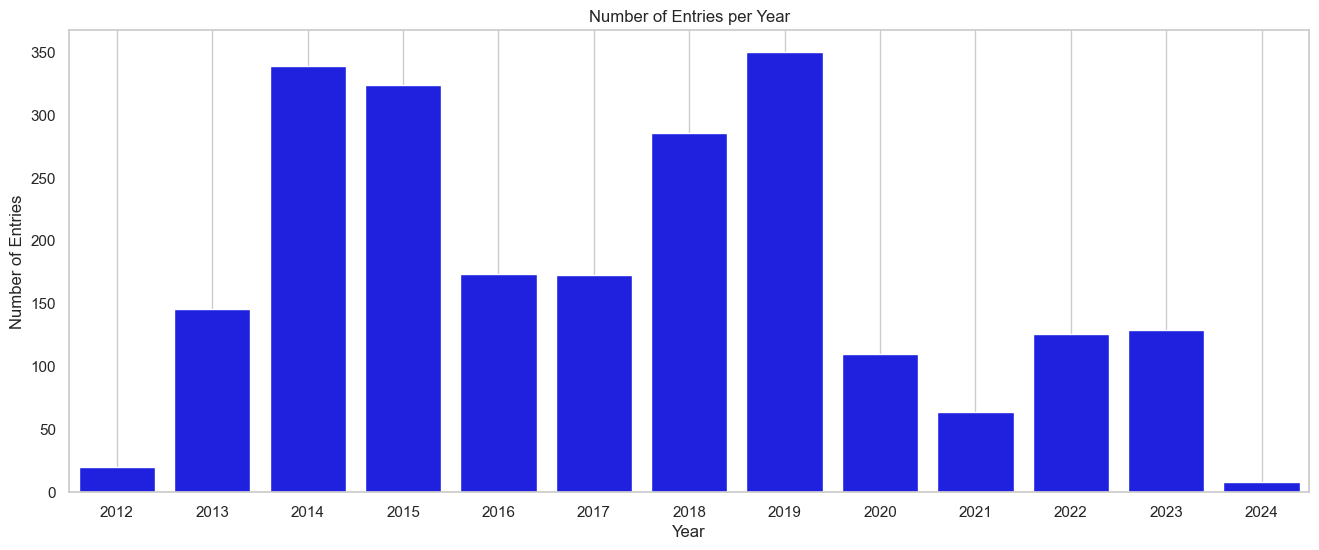

In [79]:
number_of_entries_per_year = data.copy()
number_of_entries_per_year['Year'] = number_of_entries_per_year['Date Published'].dt.year
number_of_entries_per_year = number_of_entries_per_year.groupby('Year').size()

plt.figure(figsize=(16, 6))
sns.barplot(x=number_of_entries_per_year.index, y=number_of_entries_per_year, color='blue')
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid()
plt.show()

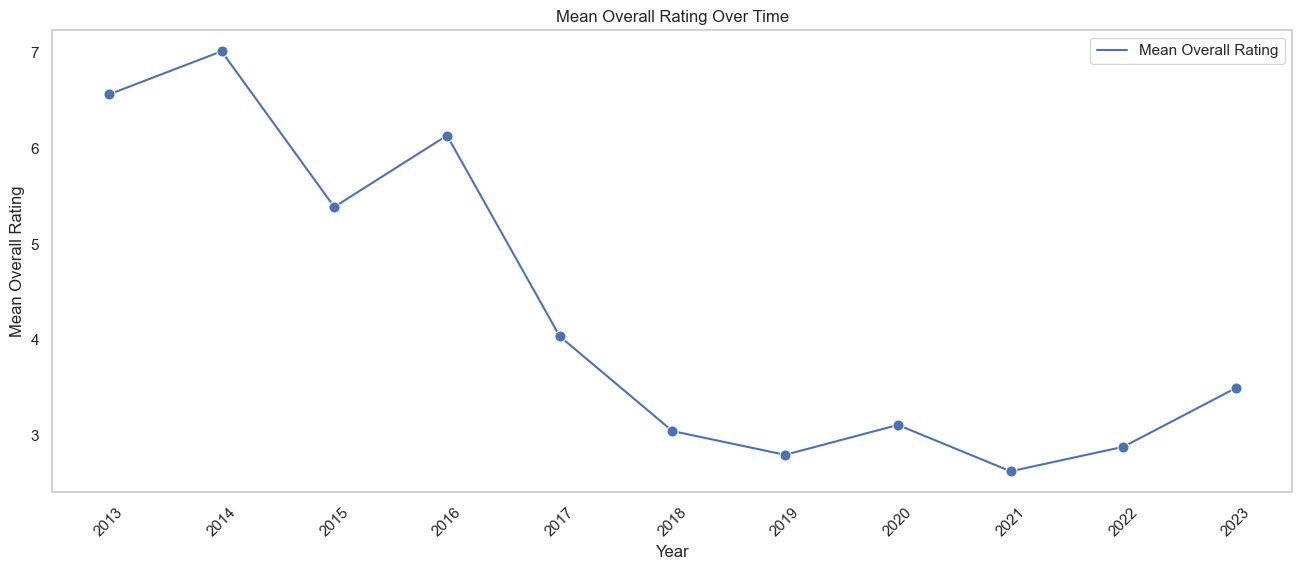

In [96]:
data2 = data.copy()

data2['Date Published'] = pd.to_datetime(data2['Date Published'])

# Filter the data for the years 2013 to 2023, as the entries before 2013 and after 2024 are very few
data2 = data2[(data2['Date Published'].dt.year >= 2013) & (data2['Date Published'].dt.year <= 2023)]

# Set "Date Published" as the index
data2.set_index('Date Published', inplace=True)

# Group by month and year of the index and calculate mean of "Overall Rating"
mean_ratings = data2.groupby(data2.index.to_period('Y'))['Overall Rating'].mean()

# Convert the index to the format "month-year"
mean_ratings.index = mean_ratings.index.strftime('%Y')

# Display the resulting dataframe
mean_ratings_df = mean_ratings.to_frame(name='Mean Overall Rating')

# Plot the mean overall rating over time
plt.figure(figsize=(16, 6))
sns.lineplot(data=mean_ratings_df, marker='o', color='blue')
plt.title('Mean Overall Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Overall Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

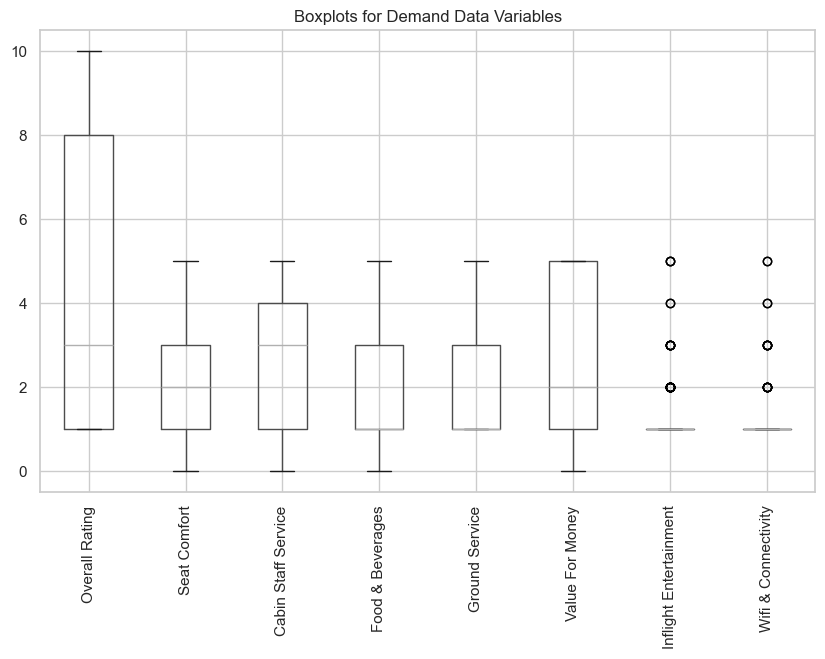

In [48]:
# Create boxplots for data
plt.figure(figsize=(10, 6))
data.select_dtypes(include=['float64']).boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots for Demand Data Variables')
plt.show()

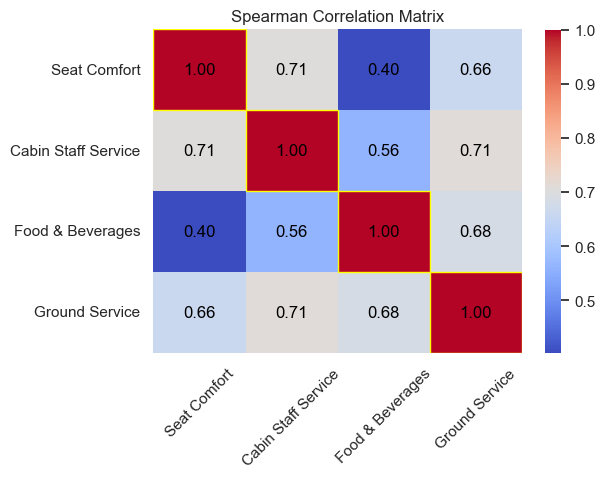

In [23]:
# Correlation matrix to see numerical relationships (spearman)
correlation_matrix = data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=1))
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.title('Spearman Correlation Matrix')
plt.show()

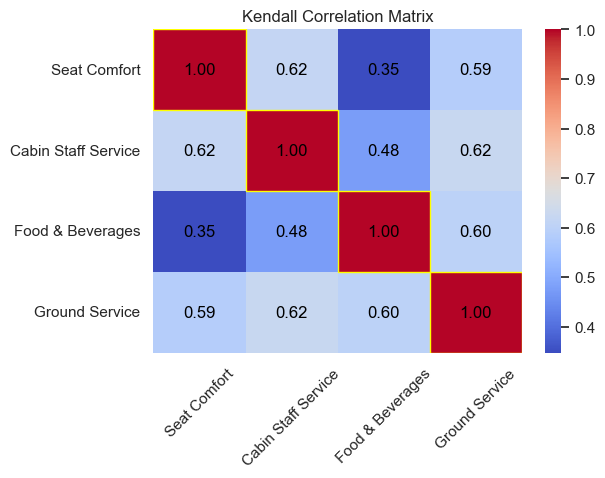

In [24]:
# Correlation matrix to see numerical relationships (kendall)
correlation_matrix = data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']].corr(method='kendall')
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=1))
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.title('Kendall Correlation Matrix')
plt.show()

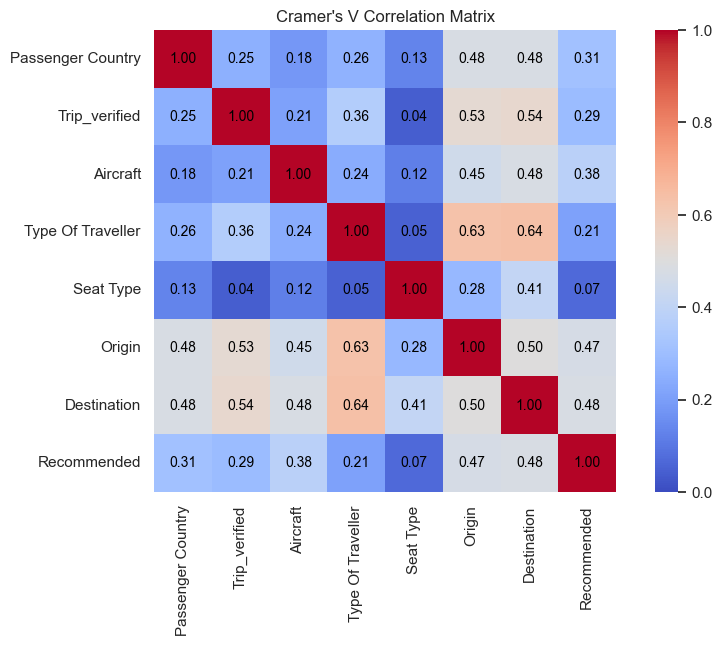

In [27]:
# Compute Cramer's V for categorical variables
non_numeric_columns = data[['Passenger Country', 'Trip_verified', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Origin', 'Destination', 'Recommended']]

label = LabelEncoder()
data_encoded = pd.DataFrame() 

for i in non_numeric_columns:
    data_encoded[i] = label.fit_transform(data[i])

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab) 
    mini = min(crosstab.shape) - 1
    return np.sqrt(stat / (obs * mini))

rows = []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2)) 
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_encoded.columns, index=data_encoded.columns)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(df, vmin=0., vmax=1, square=True, cmap='coolwarm', annot=False)

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(x=j+0.5, y=i+0.5, s="{:.2f}".format(df.iloc[i, j]), va='center', ha='center', fontsize=10, color='black')
        if abs(df.iloc[i, j]) >= 0.8 and i != j:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=1))

plt.title("Cramer's V Correlation Matrix")
plt.show()